## 21일차 강의
# 머신러닝

### 머신러닝의 체크 포인트
- 학습데이터와 테스트데이터 분리
- 정규화 (스케일 문제)
- 과적합 (예측 능력을 극대화하기 위한 parameter 조정)

### 연습문제
- 행복데이터를 불러온다
- 6개의 핵심 속성을 X, 행복지수를 y 로 불러온다
- 학습/테스트 데이터 분리 (train_test_split)
- X 값의 boxplot 을 그리고, 정규화를 적용한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
X = happy.iloc[:, 6:12].values
y = happy['Ladder score'].values
X.shape, y.shape

((149, 6), (149,))

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, X_test.shape

((119, 6), (30, 6))

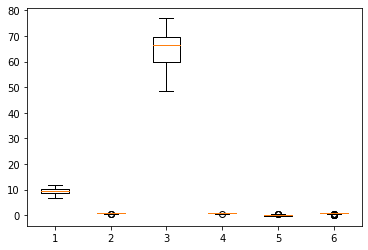

In [9]:
plt.boxplot(X); pass

In [10]:
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [11]:
X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

### 유방암 데이터

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
X = cancer.data
y = cancer.target # 0: malignant, 1: benign

In [14]:
np.bincount(y)

array([212, 357], dtype=int64)

In [15]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

In [18]:
model = SVC()

In [19]:
model.fit(X_train, y_train)

SVC()

In [20]:
pred_y = model.predict(X_test)
pred_y

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [21]:
model.score(X_test, y_test) # (pred_y==y_test).mean()

0.9230769230769231

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9230769230769231

### 정규화 적용

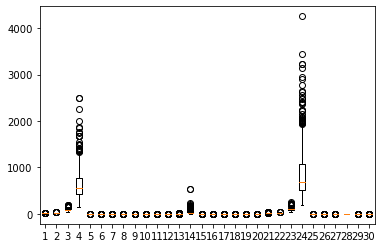

In [24]:
plt.boxplot(cancer.data); pass

In [25]:
X_train_norm = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
X_test_norm = (X_test - X_train.mean(axis=0))/X_train.std(axis=0)

In [26]:
model = SVC()

In [27]:
model.fit(X_train_norm, y_train)

SVC()

In [28]:
pred_y = model.predict(X_test_norm)
pred_y

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [29]:
model.score(X_test_norm, y_test)

0.951048951048951

### SVC() 의 옵션들
- C
- gamma

In [30]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [33]:
model = SVC()
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)
s1,s2

(0.9882629107981221, 0.951048951048951)

In [39]:
model = SVC(C=10)
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)
s1,s2

(0.9929577464788732, 0.972027972027972)

In [40]:
model = SVC(C=100)
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)
s1,s2

(1.0, 0.965034965034965)

In [37]:
model = SVC(C=0.1)
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)
s1,s2

(0.6244131455399061, 0.6363636363636364)

### 과적합 이슈

In [41]:
model = SVC(gamma=100)
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)
s1,s2

(1.0, 0.6363636363636364)

In [43]:
model = SVC(gamma=0.01)
model.fit(X_train_norm, y_train)
s1 = model.score(X_train_norm, y_train)
s2 = model.score(X_test_norm, y_test)
s1,s2

(0.9788732394366197, 0.972027972027972)

In [45]:
np.bincount(y_test) /143

array([0.36363636, 0.63636364])

In [58]:
gs = [0.00001, 0.0001,0.001, 0.01,0.1,1,10]

In [59]:
train_s = []
test_s = []

for g in gs:
    model = SVC(C=10, gamma=g)
    model.fit(X_train_norm, y_train)
    s1 = model.score(X_train_norm, y_train)
    s2 = model.score(X_test_norm, y_test)
    train_s.append(s1)
    test_s.append(s2)
    
display(train_s, test_s)

[0.7793427230046949,
 0.9483568075117371,
 0.9788732394366197,
 0.9906103286384976,
 1.0,
 1.0,
 1.0]

[0.7972027972027972,
 0.958041958041958,
 0.958041958041958,
 0.965034965034965,
 0.9440559440559441,
 0.6433566433566433,
 0.6363636363636364]

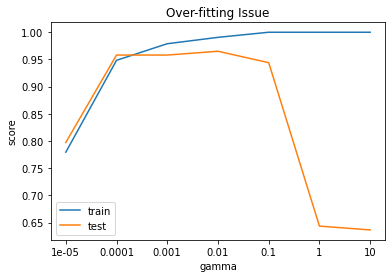

In [61]:
plt.title('Over-fitting Issue')
plt.plot(train_s)
plt.plot(test_s)
plt.legend(['train','test'])
plt.ylabel('score')
plt.xlabel('gamma')
plt.xticks(range(len(gs)), gs)
pass

### 속성을 2개로 제한
- 분류 문제에서 속성이 2개일 때만 산점도를 그리고, 경계선도 표시할 수 있다

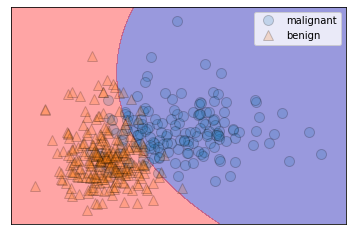

In [72]:
col1 = 0
col2 = 1

X_train_norm = X_train_norm[:, [col1,col2]]
X_test_norm = X_test_norm[:, [col1,col2]]

model = SVC(C=10, gamma=0.01)
model.fit(X_train_norm, y_train)

import mglearn

mglearn.plots.plot_2d_separator(model, X_train_norm, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_train_norm[:, 0], X_train_norm[:, 1], y_train, alpha=0.2)
plt.legend(['malignant','benign'])

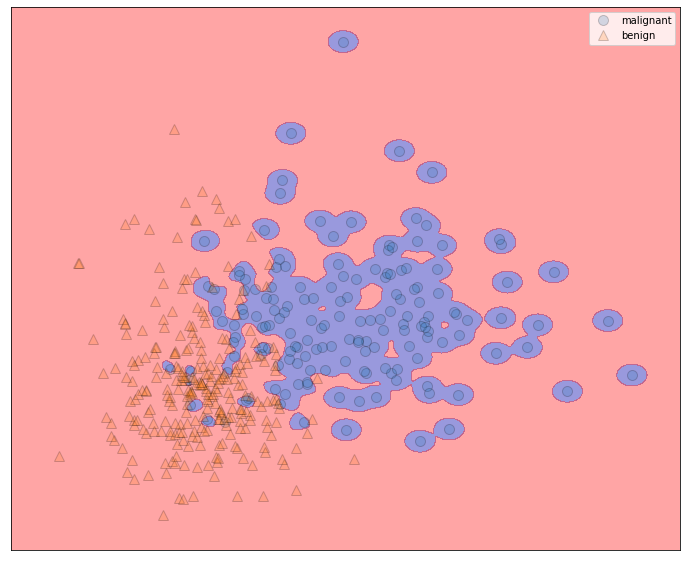

In [76]:
col1 = 0
col2 = 1

X_train_norm = X_train_norm[:, [col1,col2]]
X_test_norm = X_test_norm[:, [col1,col2]]

model = SVC(C=10, gamma=100)
model.fit(X_train_norm, y_train)

import mglearn

plt.figure(figsize=[12,10])
mglearn.plots.plot_2d_separator(model, X_train_norm, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_train_norm[:, 0], X_train_norm[:, 1], y_train, alpha=0.2)
plt.legend(['malignant','benign'])

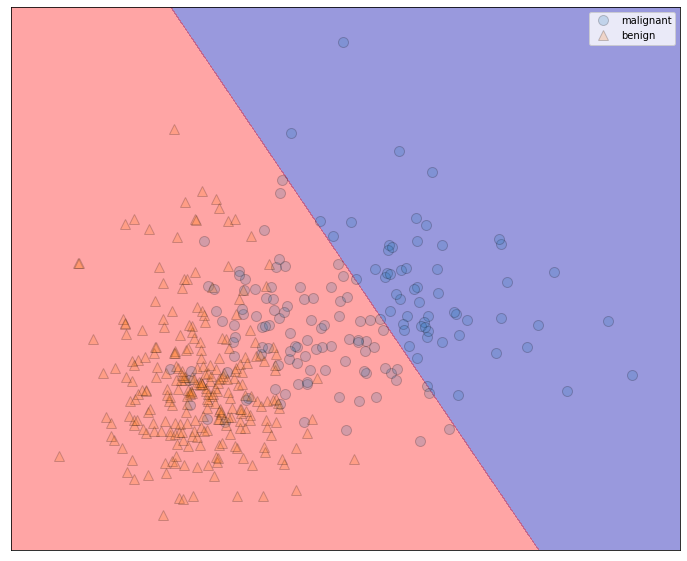

In [78]:
col1 = 0
col2 = 1

X_train_norm = X_train_norm[:, [col1,col2]]
X_test_norm = X_test_norm[:, [col1,col2]]

model = SVC(C=10, gamma=0.0001)
model.fit(X_train_norm, y_train)

import mglearn

plt.figure(figsize=[12,10])
mglearn.plots.plot_2d_separator(model, X_train_norm, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_train_norm[:, 0], X_train_norm[:, 1], y_train, alpha=0.2)
plt.legend(['malignant','benign'])

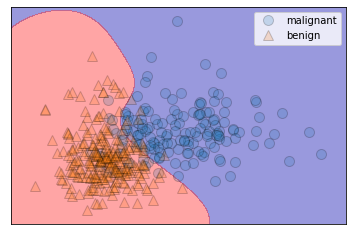

In [82]:
col1 = 0
col2 = 1

X_train_norm = X_train_norm[:, [col1,col2]]
X_test_norm = X_test_norm[:, [col1,col2]]

model = SVC(probability=True)
model.fit(X_train_norm, y_train)

import mglearn

mglearn.plots.plot_2d_separator(model, X_train_norm, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_train_norm[:, 0], X_train_norm[:, 1], y_train, alpha=0.2)
plt.legend(['malignant','benign'])

Text(0.5, 1.0, 'SVM - decision bounds')

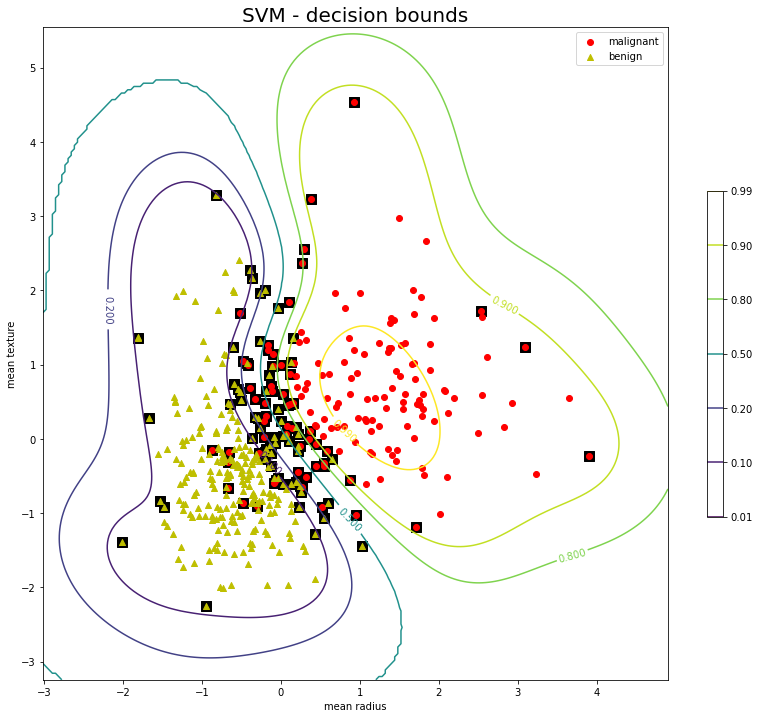

In [83]:
xmax = X_train_norm[:,0].max()+1
xmin = X_train_norm[:,0].min()-1
ymax = X_train_norm[:,1].max()+1
ymin = X_train_norm[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X_train_norm[:,0][y_train==0],X_train_norm[:,1][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_norm[:,0][y_train==1],X_train_norm[:,1][y_train==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)